## EE346 Prelab 3
**Christopher Tinker**
2023-10-16

1.
Abs. Max. Ratings:  
**PRV:** 50 V  
**Average Rectified Forward Current**: 1.0 A  
**Non-Repetitive Peak Surge Current**: 30 A   
**Maximum Reverse Current:** 10 $\mu A$  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use("ggplot")

# Constants
I_S = 1e-9 # in A
V_T = 25e-3 # thermal voltage in Volts
n = 1.69 # non-idealities factor
diode_eq = lambda v_in: I_S * (np.exp(v_in / (n *V_T)) - 1)


In [2]:
vd_fwd = np.linspace(0.0, 1.0, 1000)
id_fwd = diode_eq(vd_fwd)

i = 0
while (id_fwd[i] < 10e-3):
    i += 1
id_fwd = id_fwd[:i]
vd_fwd = vd_fwd[:i]

Text(0, 0.5, '$I_f$ (A)')

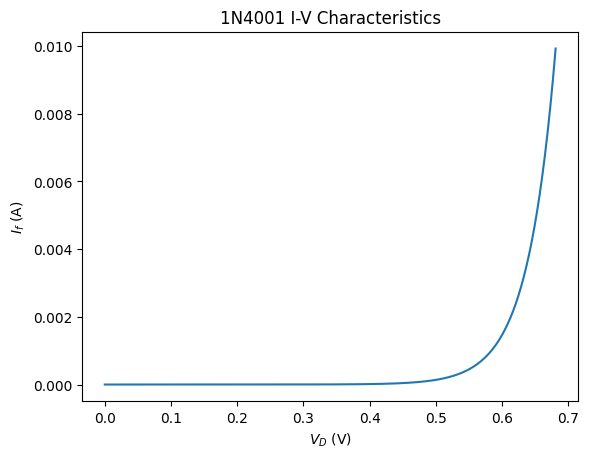

In [3]:
plt.plot(vd_fwd, id_fwd)
plt.title("1N4001 I-V Characteristics")
plt.xlabel(r"$V_D$ (V)")
plt.ylabel(r"$I_f$ (A)")

Text(0, 0.5, '$I_r$ (A)')

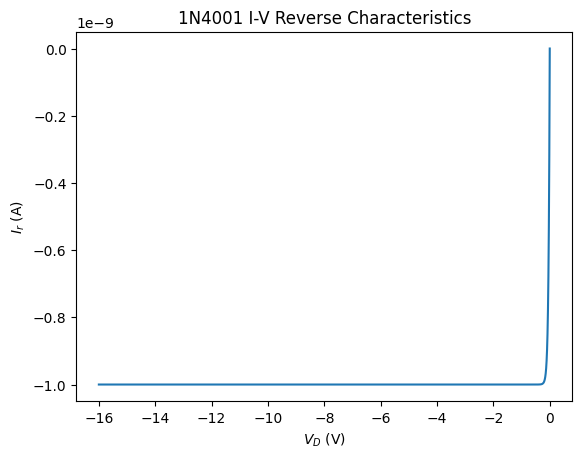

In [4]:
vd_rev = np.linspace(0, -16, 1000)
id_rev = diode_eq(vd_rev)

plt.plot(vd_rev, id_rev)
plt.title("1N4001 I-V Reverse Characteristics")
plt.xlabel(r"$V_D$ (V)")
plt.ylabel(r"$I_r$ (A)")

['Vin', 'Vd (V)', 'Vr (V)', 'Id (mA) (supply)', 'Ir (A) (experimental)', '', '', '', '', 'Vin (rev)', 'Vr (mV) (rev)', 'Id (mA) (supply) (rev)']


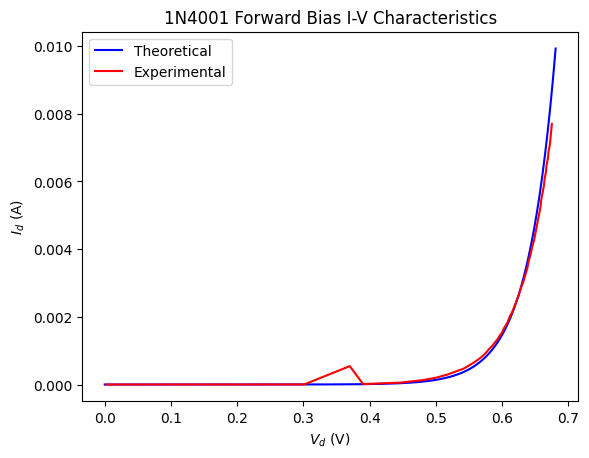

In [10]:
import csv

CSV_FNAME = "./ee346-lab3.csv"
with open(CSV_FNAME, 'r') as csv_in:
    reader = csv.DictReader(csv_in, dialect='excel')
    print(reader.fieldnames)

    vd_fwd_exp = []
    id_fwd_exp = []
    vd_rev_exp = []
    id_rev_exp = []
    for line in reader:
        vd_fwd_exp.append(float(line["Vd (V)"]))
        id_fwd_exp.append(float(line['Ir (A) (experimental)']))

        if line["Vin (rev)"] != '': 
            vd_rev_exp.append(abs(float(line["Vin (rev)"])))
            id_rev_exp.append(float(line["Id (mA) (supply) (rev)"]))

#plt.plot(vd_fwd_exp, id_fwd_exp)

id_fwd_exp = [x for _, x in sorted(zip(vd_fwd_exp, id_fwd_exp))]
vd_fwd_exp.sort()
plt.plot(vd_fwd, id_fwd, 'b-', label="Theoretical")
plt.plot(vd_fwd_exp, id_fwd_exp, 'r-', label="Experimental")
plt.title("1N4001 Forward Bias I-V Characteristics")
plt.xlabel(r"$V_d$ (V)")
plt.ylabel(r"$I_d$ (A)")
plt.legend()

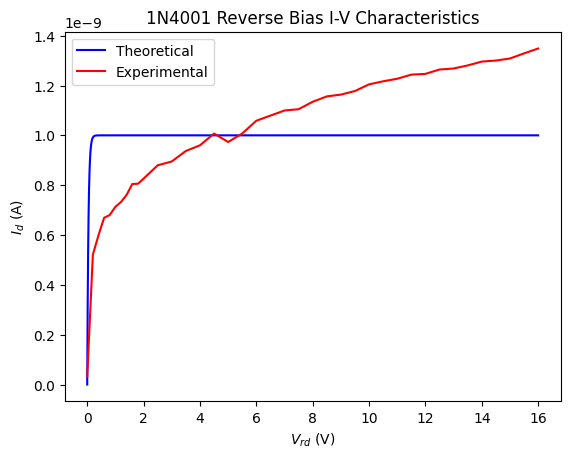

In [6]:
plt.plot(np.abs(vd_rev), np.abs(id_rev), "b-", label="Theoretical")
plt.plot(vd_rev_exp, id_rev_exp, "r-", label="Experimental")
plt.title("1N4001 Reverse Bias I-V Characteristics")
plt.xlabel(r"$V_{rd}$ (V)")
plt.ylabel(r"$I_d$ (A)")
plt.legend()